### Task: Build an AI system that recognizes digits from a handwritten postal codes

You work at the post office and you want to build a system that automatically reads digits from the postal codes. You work on an already prepared dataset of handwritten digits. The data is prepared and standardized (digits are in the central part of each image, they are all grayscale). 

You will apply decision tree and random forest and try to tune hyperparameters with both basic split of data into train and validation dataset and with Cross-Validation. 

In the first step see what happens when you run the below code. Then go to task 1, task 2, task 3 and task 4 below and try to fuflill them.

### MNIST Dataset

| Property | Value |
|--------|-------|
| **Name** | **MNIST** (Modified National Institute of Standards and Technology) |
| **Task** | **Handwritten digit classification (0–9)** |
| **Samples** | **70,000 grayscale images (we will use only 10,000 for speed)** |
| **Size** | **28×28 pixels** → **784 features** |
| **Pixel values** | **0 (black) to 255 (white)** |
| **Classes** | **10 balanced classes** (~7,000 per digit) |


### Import of necessary Python libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

### Import of MNIST dataset
X - image of handwritten digit

y - label which we want to predict

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X_full, y_full = mnist.data, mnist.target.astype(int)

### We will work on subsample for speed: 10,000 samples (still diverse dataset)

In [3]:
np.random.seed(42)
sample_idx = np.random.choice(len(X_full), 10000, replace=False)
X = X_full[sample_idx]
y = y_full[sample_idx]

In [4]:
print(f"Using {X.shape[0]} samples, {X.shape[1]} features (28x28 images) - all features are pixels of images")

Using 10000 samples, 784 features (28x28 images) - all features are pixels of images


### Plot one example
Change X[0] and y[0] for example to X[2] and y[2] to see other numbers

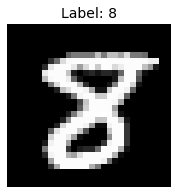

In [5]:
plt.figure(figsize=(3, 3))
plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y[0]}", fontsize=14)
plt.axis('off')
plt.show()

## Part 1: hyperparameters for decision tree and random forest on basic split of data
Split: 60% train, 20% valid, 20% test

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Train: {len(X_train)}, Valid: {len(X_valid)}, Test: {len(X_test)}")

Train: 6000, Valid: 2000, Test: 2000


### Basic split hyperparameter tuning – Decision Tree


Tuning Decision Tree...
  max_depth=3: Valid Acc = 0.504
  max_depth=4: Valid Acc = 0.598
  max_depth=5: Valid Acc = 0.662
  max_depth=6: Valid Acc = 0.730
  max_depth=7: Valid Acc = 0.771
  max_depth=8: Valid Acc = 0.781
  max_depth=9: Valid Acc = 0.782
  max_depth=10: Valid Acc = 0.785
  max_depth=11: Valid Acc = 0.784
  max_depth=12: Valid Acc = 0.780
  max_depth=15: Valid Acc = 0.781
  max_depth=None: Valid Acc = 0.782
Best max_depth for DT: 10


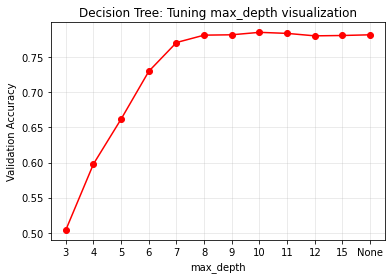

In [20]:
depths = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, None]
dt_scores = []

print("\nTuning Decision Tree...")
for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_valid)
    score = accuracy_score(y_valid, y_pred)
    dt_scores.append(score)
    print(f"  max_depth={d if d else 'None'}: Valid Acc = {score:.3f}")

best_dt_depth = depths[np.argmax(dt_scores)]
print(f"Best max_depth for DT: {best_dt_depth}")

# Plot tuning
plt.figure(figsize=(6, 4))
plt.plot([str(d) if d else 'None' for d in depths], dt_scores, 'o-', color='red')
plt.xlabel("max_depth")
plt.ylabel("Validation Accuracy")
plt.title("Decision Tree: Tuning max_depth visualization")
plt.grid(True, alpha=0.3)
plt.show()

### Basic split hyperparameter tuning – Random Forest

In [8]:
rf_depths = [5, 8, 10, 12, None]
rf_n_trees = [50, 100, 150, 200, 250, 300]
best_rf_score = 0
best_rf_params = (None, None)

print("\nTuning Random Forest...")
for d in rf_depths:
    for n in rf_n_trees:
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_valid)
        score = accuracy_score(y_valid, y_pred)
        print(f"  depth={d if d else 'None'}, trees={n}: Valid Acc = {score:.3f}")
        if score > best_rf_score:
            best_rf_score = score
            best_rf_params = (d, n)

best_rf_depth, best_rf_n = best_rf_params
print(f"Best RF: max_depth={best_rf_depth}, n_estimators={best_rf_n}")



Tuning Random Forest...
  depth=5, trees=50: Valid Acc = 0.845
  depth=5, trees=100: Valid Acc = 0.849
  depth=5, trees=150: Valid Acc = 0.856
  depth=5, trees=200: Valid Acc = 0.854
  depth=5, trees=250: Valid Acc = 0.855
  depth=5, trees=300: Valid Acc = 0.856
  depth=8, trees=50: Valid Acc = 0.911
  depth=8, trees=100: Valid Acc = 0.917
  depth=8, trees=150: Valid Acc = 0.915
  depth=8, trees=200: Valid Acc = 0.918
  depth=8, trees=250: Valid Acc = 0.916
  depth=8, trees=300: Valid Acc = 0.916
  depth=10, trees=50: Valid Acc = 0.926
  depth=10, trees=100: Valid Acc = 0.928
  depth=10, trees=150: Valid Acc = 0.933
  depth=10, trees=200: Valid Acc = 0.933
  depth=10, trees=250: Valid Acc = 0.931
  depth=10, trees=300: Valid Acc = 0.928
  depth=12, trees=50: Valid Acc = 0.931
  depth=12, trees=100: Valid Acc = 0.934
  depth=12, trees=150: Valid Acc = 0.940
  depth=12, trees=200: Valid Acc = 0.939
  depth=12, trees=250: Valid Acc = 0.938
  depth=12, trees=300: Valid Acc = 0.939
  depth

### Basic split retrain on train + validation for the best sets of hyperparameters

In [9]:
X_train_valid = np.vstack([X_train, X_valid])
y_train_valid = np.concatenate([y_train, y_valid])

# Final DT
dt_final = DecisionTreeClassifier(max_depth=best_dt_depth, random_state=42)
dt_final.fit(X_train_valid, y_train_valid)

# Final RF
rf_final = RandomForestClassifier(n_estimators=best_rf_n, max_depth=best_rf_depth, random_state=42, n_jobs=-1)
rf_final.fit(X_train_valid, y_train_valid)

# Our final models are: dt_final and rf_final

RandomForestClassifier(n_estimators=250, n_jobs=-1, random_state=42)

### Basic split evaluate both retrained models on test set

In [10]:
y_pred_dt = dt_final.predict(X_test)
y_pred_rf = rf_final.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"\nTest Accuracy - Decision Tree: {acc_dt:.3f}")
print(f"Test Accuracy - Random Forest: {acc_rf:.3f}")


Test Accuracy - Decision Tree: 0.800
Test Accuracy - Random Forest: 0.935


## Part 2: hyperparameters for decision tree and random forest on Cross-Validation

### Hyperparameters tuning with 5-fold CV on train + valid (80%)

In [11]:
# Combine train + validation for CV tuning
X_train_valid = np.vstack([X_train, X_valid])
y_train_valid = np.concatenate([y_train, y_valid])

### CV hyperparameter tuning – Decision Tree

In [13]:
dt_param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 18, None]
}

dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
dt_grid.fit(X_train_valid, y_train_valid)

best_dt_cv = dt_grid.best_estimator_
best_dt_depth_cv = best_dt_cv.get_params()['max_depth']
print(f"Best DT params: {dt_grid.best_params_}")
print(f"Best DT CV accuracy: {dt_grid.best_score_:.3f}")

Best DT params: {'max_depth': 15}
Best DT CV accuracy: 0.787


### CV hyperparameter tuning – Random Forest

In [14]:
rf_param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [ 5, 8, 10, 12, None],
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
rf_grid.fit(X_train_valid, y_train_valid)

best_rf_cv = rf_grid.best_estimator_
print(f"Best RF params: {rf_grid.best_params_}")
print(f"Best RF CV accuracy: {rf_grid.best_score_:.3f}")

Best RF params: {'max_depth': None, 'n_estimators': 300}
Best RF CV accuracy: 0.941


Comment: GridSearchCV automatically retrains the best model on the entire dataset passed to .fit() e.g.

rf_grid.fit(X_train_valid, y_train_valid)


### CV evaluate both retrained models on test set

In [15]:
dt_final_cv = best_dt_cv
rf_final_cv = best_rf_cv

# Final evaluation on test set (20%)
y_pred_dt_cv = dt_final_cv.predict(X_test)
y_pred_rf_cv = rf_final_cv.predict(X_test)

acc_dt_cv = accuracy_score(y_test, y_pred_dt_cv)
acc_rf_cv = accuracy_score(y_test, y_pred_rf_cv)

print(f"\nTest Accuracy - Decision Tree: {acc_dt_cv:.3f}")
print(f"Test Accuracy - Random Forest: {acc_rf_cv:.3f}")


Test Accuracy - Decision Tree: 0.799
Test Accuracy - Random Forest: 0.940


### Plot all 4 results for accuracy visualization

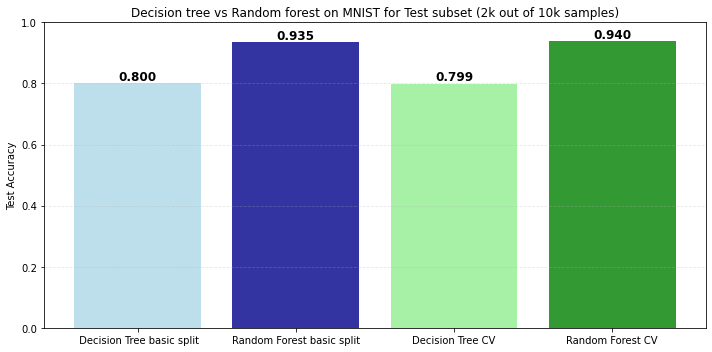

In [19]:
plt.figure(figsize=(10, 5))
models = [' Decision Tree basic split', 'Random Forest basic split','Decision Tree CV', 'Random Forest CV']
accs = [acc_dt, acc_rf, acc_dt_cv, acc_rf_cv]
bars = plt.bar(models, accs, color=['lightblue', 'darkblue', 'lightgreen', 'green'], alpha=0.8)
plt.ylim(0, 1)
plt.ylabel("Test Accuracy")
plt.title("Decision tree vs Random forest on MNIST for Test subset (2k out of 10k samples)")
for i, v in enumerate(accs):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

### Task 1: add more hyperparameters to tune for both Decision Tree and Random Forest
Add more hyperparameters to tune above for both basic split and CV. 

Use the hyperparameters cheatsheet below.

What happens?

Is there any improvement on the test dataset accuracy comparison plot?

Remember: for fair comparison, basic split and CV have to be tuned on the same ranges of hyperparameters.

Remember: If you have too many hyperparameters and values to check, your CV will take longer time to compute all combinations.

### Hyperparameters Cheat Sheet  
**Decision Tree & Random Forest**

| Parameter | Decision Tree | Random Forest | Description |
|---------|---------------|----------------|-----------|
| `max_depth` | Yes | Yes | Max depth of tree e.g. 5, 10, 15 etc. **Deeper = overfit** |
| `min_samples_split` | Yes | Yes | Min samples to split a node e.g. 5, 10, 15 etc. **Higher = simpler tree** |
| `min_samples_leaf` | Yes | Yes | Min samples in a leaf e.g. 5, 10, 20 etc.. **Higher = smoother** |
| `max_features` | Yes | Yes | Features to consider per split. `'sqrt'` or `'log2'` for RF |
| `n_estimators` | No | Yes | Number of trees e.g. 50, 100 etc.. **More = stable, slower** |
| `criterion` | Yes | Yes | `'gini'` or `'entropy'` (classification)<br>`'squared_error'` (regression) |
| `random_state` | Yes | Yes | For reproducibility |

### Task 2: Use stratified CV instead of standard CV
Instead of cv=5 in the GridSearchCV use: cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Replace the code for CV training for decision tree and random forest. Is there any improvement?

### Task 3: Below you will find 4 helpful visualizations for some of the models 
Try to prepare similar visualizations for rest of the models. Try to compare them. Are there any visible differences?

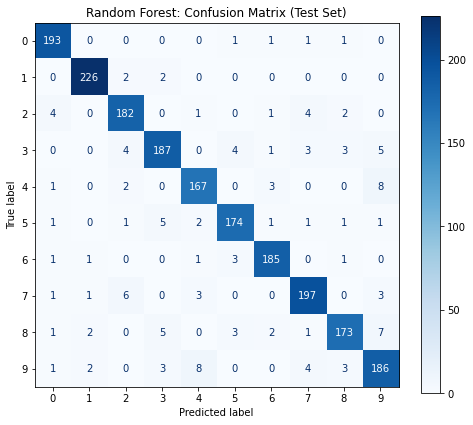

In [21]:
# Confusion Matrix (RF on basic split)
# Below you need to change y_pred_rf to predictions made for other 3 models

fig, ax = plt.subplots(figsize=(7, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=ax, cmap='Blues', values_format='d') 
plt.title("Random Forest basic split: Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()

In [ ]:
# Confusion Matrix (RF on CV)


In [ ]:
# Confusion Matrix (DT on basic split)


In [ ]:
# Confusion Matrix (DT on CV)


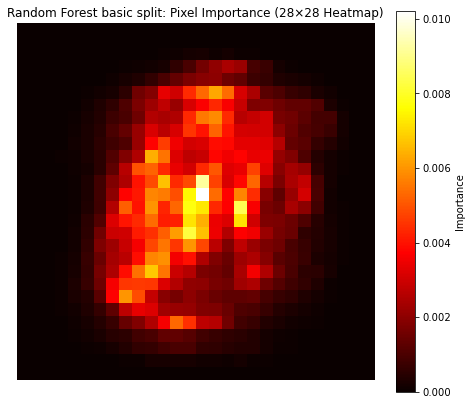

In [23]:
# Feature importance heatmap (RF on basic split)
# Below you need to change rf_final 

importances = rf_final.feature_importances_
plt.figure(figsize=(8, 7))
plt.imshow(importances.reshape(28, 28), cmap='hot', interpolation='nearest')
plt.colorbar(label='Importance')
plt.title("Random Forest basic split: Pixel Importance (28×28 Heatmap)")
plt.axis('off')
plt.show()

In [ ]:
# Feature importance heatmap (RF on CV)


In [ ]:
# Feature importance heatmap (DT on basic split)


In [ ]:
# Feature importance heatmap (DT on CV)


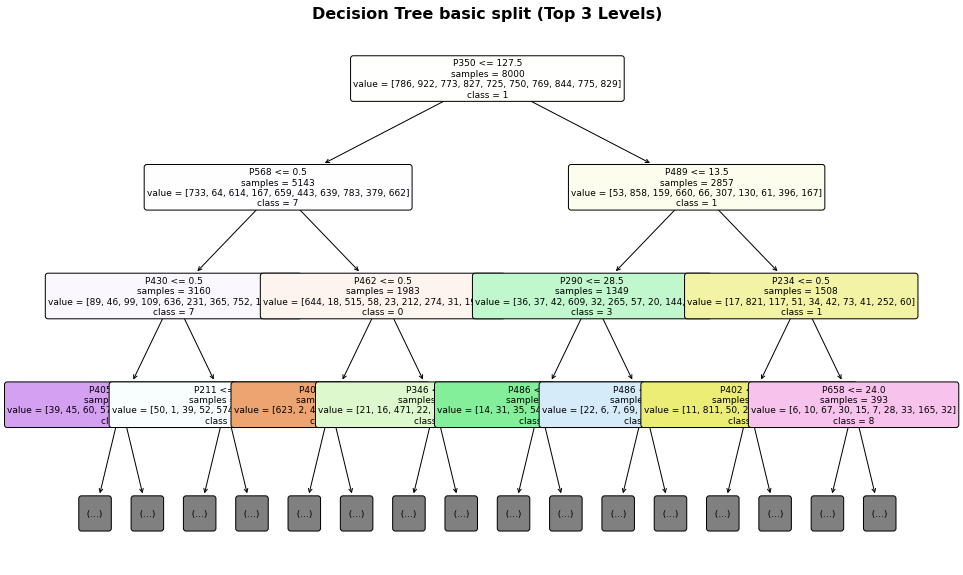

In [24]:
#Visualize Decision Tree (top 3 levels) Decision Tree basic split
# Below you need to change dt_final 

plt.figure(figsize=(15, 10))
plot_tree(dt_final,
          filled=True,
          rounded=True,
          feature_names=[f"P{i}" for i in range(784)],
          class_names=[str(i) for i in range(10)],
          fontsize=9,
          max_depth=3,
          impurity=False)
plt.title("Decision Tree basic split (Top 3 Levels)", fontsize=16, weight='bold')
plt.show()

In [ ]:
#Visualize Decision Tree (top 3 levels) Decision Tree CV


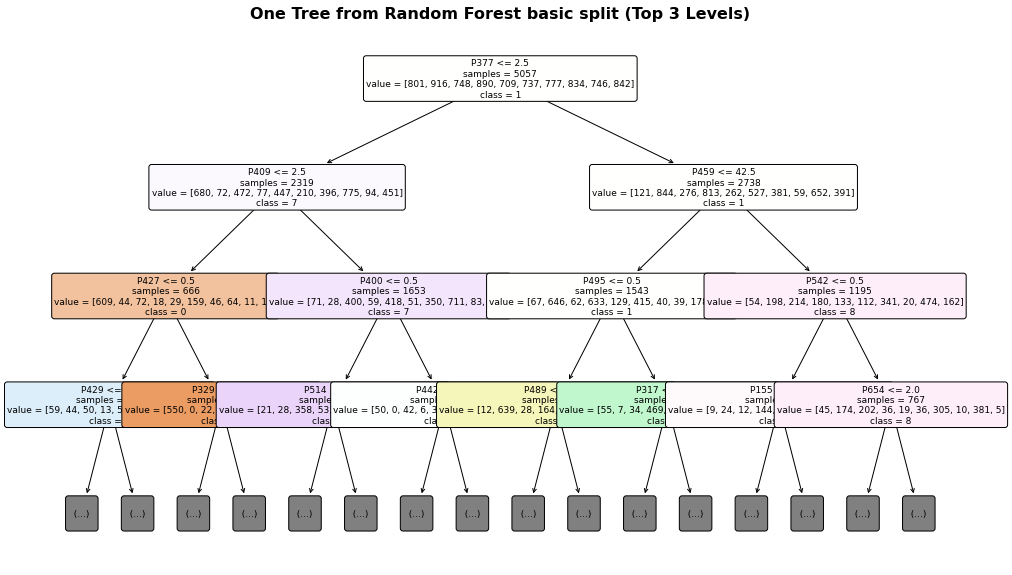

In [25]:
# Visualize trees from Random Forest: rf_final.estimators_[0] means the first tree in a forest
# Below you need to change rf_final

plt.figure(figsize=(16, 10))
plot_tree(rf_final.estimators_[0],
          filled=True,
          rounded=True,
          feature_names=[f"P{i}" for i in range(784)],
          class_names=[str(i) for i in range(10)],
          fontsize=9,
          max_depth=3,
          impurity=False)
plt.title("One Tree from Random Forest basic split (Top 3 Levels)", fontsize=16, weight='bold')
plt.show()

In [ ]:
#Visualize trees from Random Forest: Tree from random forest CV


# Bonus - visualization of pixels 

In the Decision tree and trees from random forest above you can see e.g. P400 <= 2.5. What it means?

Pixel Value Meaning in decision tree/random forest for exemplary pixel 400 (P400): 

P400 = 0 Black

P400 = 2 Very dark gray

P400 = 3 Slightly less dark

P400 = 100 Medium gray

P400 = 255 White

### Below you can see 5 digits + marked P400 (row 14, col 12)

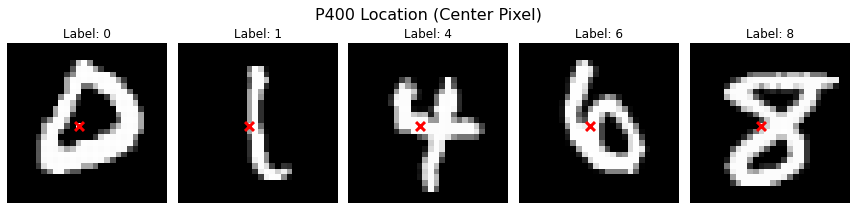

In [26]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
selected_digits = [0, 1, 4, 6, 8]

for i, digit in enumerate(selected_digits):
    idx = np.where(y == digit)[0][0]
    img = X[idx].reshape(28, 28).copy()
    
    # Highlight P400
    img[14, 12] = 255  # make it white
    axes[i].imshow(img, cmap='gray')
    axes[i].scatter(12, 14, c='red', s=80, marker='x', linewidths=3)
    axes[i].set_title(f"Label: {digit}", fontsize=12)
    axes[i].axis('off')

plt.suptitle("P400 Location (Center Pixel)", fontsize=16)
plt.tight_layout()
plt.show()

### Task 4: Work with interactive visualization below.

Use the sliders to change some of the values. 

You can choose sample that you work with (above we worked on 10000 sample) and manually choose hyperparameters. Then with your manually chosen hyperparameters model is trained on train + validation dataset (80% of the sample) and tested on 20% test dataset.

What happens with accuracy on train+validation and on test datasets?

What happens with feature importance and confusion matrix?


In [27]:
# ==========================================================
# INTERACTIVE: DT vs RF on MNIST 
# ==========================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import ipywidgets as widgets
from ipywidgets import interact
import warnings
warnings.filterwarnings("ignore")

X_full, y_full = mnist.data, mnist.target.astype(int)

# Cache
X_cache = {}
y_cache = {}

def get_data(n_samples=5000):
    if n_samples not in X_cache:
        np.random.seed(42)
        idx = np.random.choice(len(X_full), n_samples, replace=False)
        X_cache[n_samples] = X_full[idx]
        y_cache[n_samples] = y_full[idx]
    return X_cache[n_samples], y_cache[n_samples]

# ----------------------------------------------------------
# Interactive Function
# ----------------------------------------------------------
@interact(
    n_samples=widgets.IntSlider(5000, 100, 10000, 100, description="Samples:"),
    dt_depth=widgets.IntSlider(6, 2, 20, 1, description="DT Depth:"),
    rf_depth=widgets.IntSlider(10, 3, 20, 1, description="RF Depth:"),
    rf_trees=widgets.IntSlider(100, 10, 300, 10, description="RF Trees:")
)
def compare_models(n_samples, dt_depth, rf_depth, rf_trees):
    X, y = get_data(n_samples)
    
    # Split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    X_train_valid = np.vstack([X_train, X_valid])
    y_train_valid = np.concatenate([y_train, y_valid])
    
    # Models
    dt = DecisionTreeClassifier(max_depth=dt_depth, random_state=42)
    rf = RandomForestClassifier(n_estimators=rf_trees, max_depth=rf_depth, random_state=42, n_jobs=-1)
    
    dt.fit(X_train_valid, y_train_valid)
    rf.fit(X_train_valid, y_train_valid)
    
    # Predictions
    y_pred_dt_train = dt.predict(X_train_valid)
    y_pred_rf_train = rf.predict(X_train_valid)
    y_pred_dt_test = dt.predict(X_test)
    y_pred_rf_test = rf.predict(X_test)
    
    # Accuracies
    acc_dt_train = accuracy_score(y_train_valid, y_pred_dt_train)
    acc_rf_train = accuracy_score(y_train_valid, y_pred_rf_train)
    acc_dt_test = accuracy_score(y_test, y_pred_dt_test)
    acc_rf_test = accuracy_score(y_test, y_pred_rf_test)
    
    # Feature importance
    dt_importance = np.zeros(784)
    valid_features = dt.tree_.feature[dt.tree_.feature >= 0]
    dt_importance[valid_features] = dt.tree_.impurity[dt.tree_.feature >= 0]
    dt_importance /= dt_importance.max() if dt_importance.max() > 0 else 1
    
    rf_importance = rf.feature_importances_
    
    # --- LAYOUT: 3x2 with bottom plots ---
    fig = plt.figure(figsize=(16, 12))  # Increased height
    gs = fig.add_gridspec(
        3, 2,
        height_ratios=[1, 1.8, 1.8], 
        width_ratios=[1, 1],
        hspace=0.4, wspace=0.3
    )
    
    # 1. Train+Valid Accuracy
    ax1 = fig.add_subplot(gs[0, 0])
    bars = ax1.bar(['DT', 'RF'], [acc_dt_train, acc_rf_train], color=['darkblue', 'blue'], alpha=0.8)
    ax1.set_ylim(0, 1.05)
    ax1.set_title("Train+Valid Accuracy", fontweight='bold', fontsize=13)
    for i, v in enumerate([acc_dt_train, acc_rf_train]):
        ax1.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold', fontsize=11)
    
    # 2. Test Accuracy
    ax2 = fig.add_subplot(gs[0, 1])
    bars = ax2.bar(['DT', 'RF'], [acc_dt_test, acc_rf_test], color=['darkgreen', 'lightgreen'], alpha=0.8)
    ax2.set_ylim(0, 1.05)
    ax2.set_title("Test Accuracy", fontweight='bold', fontsize=13)
    for i, v in enumerate([acc_dt_test, acc_rf_test]):
        ax2.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold', fontsize=11)
    
    # 3. DT Confusion Matrix
    ax3 = fig.add_subplot(gs[1, 0])
    disp_dt = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred_dt_test, ax=ax3, cmap='Blues', values_format='d'
    )
    ax3.set_title("Decision Tree\nConfusion Matrix: Test", fontsize=13, fontweight='bold')
    ax3.tick_params(axis='both', which='major', labelsize=10)
    
    # 4. RF Confusion Matrix
    ax4 = fig.add_subplot(gs[1, 1])
    disp_rf = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred_rf_test, ax=ax4, cmap='Blues', values_format='d'
    )
    ax4.set_title("Random Forest\nConfusion Matrix: Test", fontsize=13, fontweight='bold')
    ax4.tick_params(axis='both', which='major', labelsize=10)
    
    # 5. DT Feature Importance
    ax5 = fig.add_subplot(gs[2, 0])
    im5 = ax5.imshow(dt_importance.reshape(28, 28), cmap='hot', vmin=0, vmax=1)
    ax5.set_title("DT Feature Importance", fontsize=13, fontweight='bold')
    ax5.axis('off')
    cbar5 = plt.colorbar(im5, ax=ax5, shrink=0.8, pad=0.02)
    cbar5.ax.tick_params(labelsize=9)
    
    # 6. RF Feature Importance
    ax6 = fig.add_subplot(gs[2, 1])
    im6 = ax6.imshow(rf_importance.reshape(28, 28), cmap='hot', interpolation='nearest')
    ax6.set_title("RF Feature Importance", fontsize=13, fontweight='bold')
    ax6.axis('off')
    cbar6 = plt.colorbar(im6, ax=ax6, shrink=0.8, pad=0.02)
    cbar6.ax.tick_params(labelsize=9)
    
    # Main title
    plt.suptitle(
        f"MNIST | N={n_samples} | DT depth={dt_depth} | RF: {rf_trees} trees, depth={rf_depth}",
        fontsize=15, fontweight='bold', y=0.98
    )
    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=5000, description='Samples:', max=10000, min=100, step=100), IntSlider(v…